<div class="alert alert-block alert-success">
    <b><center>CONVOLUTON NEURAL NETWORK</center></b>
    <b><center>MNIST 데이터로 DNN 구현해 보기</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)
rsp.fixMemoryProblem()

2021-07-25 04:56:26.413030: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-07-25 04:56:28.146181: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-25 04:56:28.146846: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-07-25 04:56:28.167708: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2021-07-25 04:56:28.167725: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jupyterlab
2021-07-25 04:56:28.167730: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jupyterlab
2021-07-25 04:56:28.167791: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 47

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact

In [3]:
import tensorflow as tf
from tensorflow.keras import utils, layers, activations, models, losses, optimizers, metrics, callbacks, datasets

In [4]:
tf.__version__

'2.4.1'

# Prepare Data

In [5]:
# Download the mnist dataset using keras
(trainDatas, trainLabels), (testDatas, testLabels) = datasets.mnist.load_data()
trainDatas.shape, trainLabels.shape, testDatas.shape, testLabels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Preprocessing Data

In [6]:
# # 2차원(28*28)이미지를 1차원 배열로 변환
trainDatas = trainDatas.reshape(-1, 28, 28, 1)
testDatas = testDatas.reshape(-1, 28, 28, 1)

# trainDatas.shape, testDatas.shape

In [7]:
# 레이블 one hot encoding
trainLabels = np.eye(10)[trainLabels]
testLabels  = np.eye(10)[testLabels]

trainLabels.shape, trainLabels.shape

((60000, 10), (60000, 10))

# Generate Model

In [29]:
model = models.Sequential([
    layers.Input([28, 28, 1]),
    layers.Conv2D(32, (3, 3), (1, 1), "valid", activation=activations.relu),
    layers.MaxPool2D((2, 2), (2, 2)),
    layers.Conv2D(32, (3, 3), (1, 1), "same", activation=activations.relu),
    layers.MaxPool2D((2, 2), (2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation=activations.relu),
    layers.Dropout(0.3),
    layers.Dense(10, activation=activations.softmax)
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               295168    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

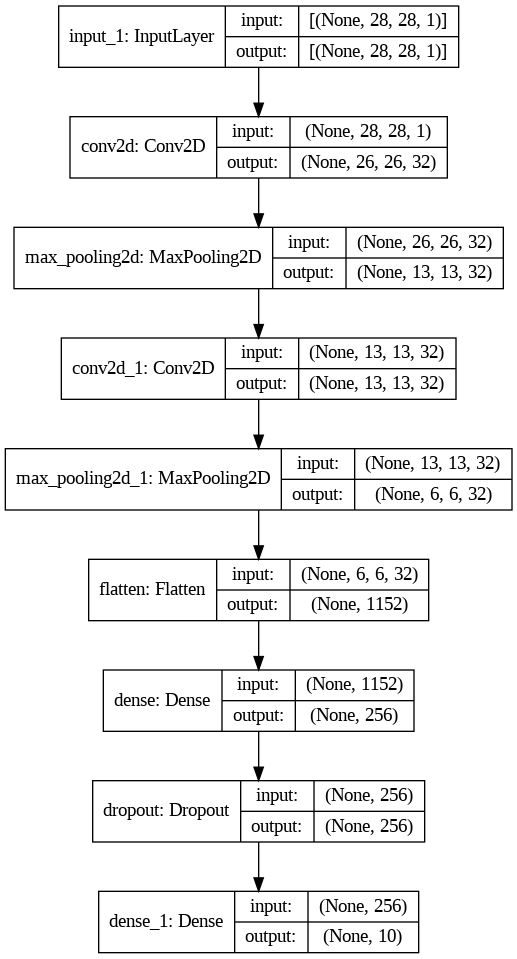

In [9]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [10]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = [metrics.CategoricalAccuracy()]
)

# Training

In [11]:
history = model.fit(
    trainDatas, trainLabels,
    batch_size=1000,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20


2021-07-25 04:56:28.764383: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-25 04:56:28.764696: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


48/48 [==============================] - 8s 166ms/step - loss: 28.0242 - categorical_accuracy: 0.1889 - val_loss: 1.5855 - val_categorical_accuracy: 0.7704
Epoch 2/20
48/48 [==============================] - 8s 158ms/step - loss: 3.1747 - categorical_accuracy: 0.6591 - val_loss: 0.6813 - val_categorical_accuracy: 0.8794
Epoch 3/20
48/48 [==============================] - 8s 163ms/step - loss: 1.3393 - categorical_accuracy: 0.7974 - val_loss: 0.4385 - val_categorical_accuracy: 0.9103
Epoch 4/20
48/48 [==============================] - 8s 165ms/step - loss: 0.8500 - categorical_accuracy: 0.8494 - val_loss: 0.3207 - val_categorical_accuracy: 0.9273
Epoch 5/20
48/48 [==============================] - 8s 166ms/step - loss: 0.5896 - categorical_accuracy: 0.8761 - val_loss: 0.2572 - val_categorical_accuracy: 0.9369
Epoch 6/20
48/48 [==============================] - 8s 168ms/step - loss: 0.4526 - categorical_accuracy: 0.8937 - val_loss: 0.2203 - val_categorical_accuracy: 0.9435
Epoch 7/20
48/

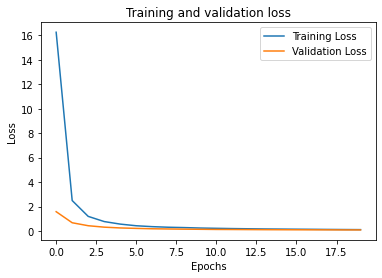

In [12]:
loss = history.history["loss"]
validationLoss = history.history["val_loss"]
epochs = range(0, len(loss))

plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, validationLoss, label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate

In [13]:
evaLoss, evaAcc = model.evaluate(testDatas, testLabels, verbose=0)
evaLoss, "{:3.2f} %".format(evaAcc*100)

(0.09344855695962906, '97.31 %')

# Predict

In [14]:
@interact(idx=(0, 10000, 1))
def showTestImage(idx):
    data = testDatas[idx].reshape(-1, 28, 28, 1)
    dataPred = model.predict(data.astype(float))

    plt.imshow(testDatas[idx].reshape(28,28), cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL: {np.argmax(testLabels[idx])}, PREDICT: {np.argmax(dataPred)}")
    plt.show()

interactive(children=(IntSlider(value=5000, description='idx', max=10000), Output()), _dom_classes=('widget-in…

# Error Find

In [15]:
errsIdx = []
testDatas = testDatas.reshape(-1, 28, 28, 1)
dataPred = model.predict(testDatas.astype(float))

for idx in range(10000):
    if np.argmax(dataPred[idx]) != np.argmax(testLabels[idx]):
        errsIdx.append(idx)

In [16]:
errsIdx

[73,
 115,
 149,
 195,
 217,
 247,
 266,
 321,
 340,
 381,
 406,
 448,
 449,
 550,
 578,
 582,
 583,
 591,
 593,
 605,
 659,
 684,
 691,
 717,
 726,
 740,
 924,
 965,
 1014,
 1039,
 1044,
 1050,
 1112,
 1114,
 1119,
 1153,
 1181,
 1182,
 1226,
 1232,
 1242,
 1247,
 1299,
 1319,
 1326,
 1393,
 1440,
 1447,
 1522,
 1527,
 1530,
 1549,
 1559,
 1581,
 1609,
 1634,
 1678,
 1681,
 1709,
 1737,
 1754,
 1790,
 1865,
 1868,
 1901,
 1941,
 1955,
 1968,
 2016,
 2024,
 2035,
 2043,
 2070,
 2109,
 2118,
 2125,
 2129,
 2130,
 2135,
 2182,
 2186,
 2189,
 2224,
 2225,
 2266,
 2293,
 2299,
 2358,
 2371,
 2395,
 2406,
 2414,
 2447,
 2488,
 2514,
 2589,
 2607,
 2628,
 2648,
 2654,
 2705,
 2720,
 2730,
 2770,
 2853,
 2896,
 2927,
 2939,
 2990,
 2995,
 3060,
 3062,
 3073,
 3114,
 3206,
 3289,
 3330,
 3384,
 3422,
 3511,
 3520,
 3534,
 3547,
 3558,
 3559,
 3573,
 3597,
 3629,
 3662,
 3681,
 3742,
 3751,
 3767,
 3778,
 3780,
 3796,
 3801,
 3808,
 3811,
 3818,
 3838,
 3848,
 3853,
 3855,
 3902,
 3906,
 3926,
